# Projet Big Scale Analytics 

## Milestone 1

### Mining Data 

## Exploration of the Data 

For the label encoding, we followed : 
https://www.service-public.fr/particuliers/vosdroits/F34739

In [186]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv (r'/Users/m/Downloads/Sam.csv')

In [187]:
df[900:940]
cols = ['Difficulty Annotator 1', 'Difficulty Annotator 2', 'Difficulty Annotator 3']
# Encode labels of multiple columns at once
#
df[cols]= df[cols].apply(LabelEncoder().fit_transform)
#
# Print head

### Label Encoding and mean of the evaluations :

In [192]:
labelencoder = LabelEncoder()


# Assigning numerical values and storing in another column
df['Eval_1_num'] = labelencoder.fit_transform(df['Difficulty Annotator 1'])
df['Eval_2_num'] = labelencoder.fit_transform(df['Difficulty Annotator 2'])
df['Eval_3_num'] = labelencoder.fit_transform(df['Difficulty Annotator 3'])

df["Eval_mean"] = round((df['Eval_1_num'] + df['Eval_2_num'] + df['Eval_3_num'])/3)

In [193]:

df[931:932]

,Text,Difficulty,Difficulty Annotator 1,Difficulty Annotator 2,Difficulty Annotator 3,Eval_1_num,Eval_2_num,Eval_3_num,Eval_mean
931,"La connexion permanente, notamment aux réseaux...",NaN,4,5,6,4,5,6,5.0


In [194]:
for i in range(len(df)):
    if int(df["Eval_mean"][i]) == 0:
        df["Difficulty"][i] = "A1"
    if int(df["Eval_mean"][i]) == 1:
        df["Difficulty"][i] = "A2"
    if int(df["Eval_mean"][i]) == 2:
        df["Difficulty"][i] = "B1"
    if int(df["Eval_mean"][i]) == 3:
        df["Difficulty"][i] = "B2"
    if int(df["Eval_mean"][i]) == 4:
        df["Difficulty"][i] = "C1"
    if int(df["Eval_mean"][i]) == 5:
        df["Difficulty"][i] = "C2"

<ipython-input-194-ec9d9680aaaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Difficulty"][i] = "A1"
/Users/m/pythonProject5/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-194-ec9d9680aaaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Difficulty"][i] = "A2"
<ipython-input-194-ec9d9680aaaa>:7: SettingW

## Some Graphs

### Density 

In [195]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

In [196]:
df['mean_word_length'] = df['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

<AxesSubplot:xlabel='word_count', ylabel='Density'>

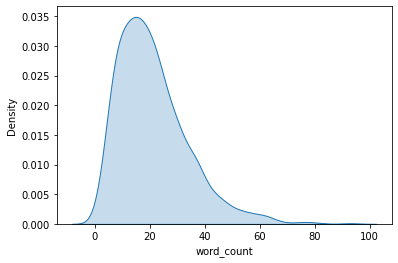

In [197]:
# density plot with shade
sns.kdeplot(df['word_count'], shade=True)
#sns.plt.show()

<AxesSubplot:xlabel='mean_word_length', ylabel='Density'>

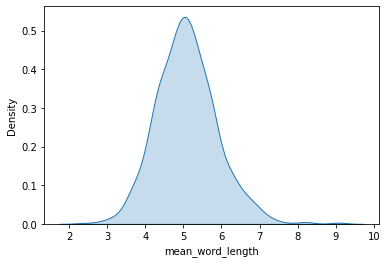

In [198]:
# density plot with shade
sns.kdeplot(df['mean_word_length'], shade=True)
#sns.plt.show()

In [199]:
df["Difficulty"].value_counts()
print(df.Difficulty.isnull().sum())

162


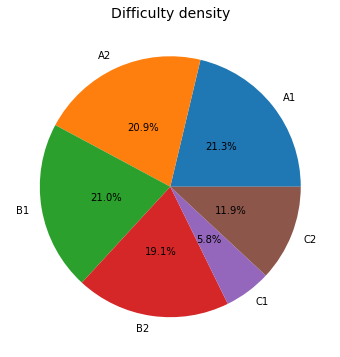

In [200]:
# Label Distribution: 
#Warning : Missing one label 
x = df.set_index(["Difficulty","Text"]).count(level="Difficulty")
x = x["Difficulty Annotator 1"]
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x, autopct="%.1f%%", labels=x.index, pctdistance=0.5)
plt.title("Difficulty density", fontsize=14);

plt.savefig('Distribution_Classes.png')

### Type of sentences

In [156]:
# What kind of graphics can we add ? 
# Density inside a level difficulty ? 
# Interogative vs exclamative vs normal sentence ? 
def whoiswho(db, sign):
    count = 0 
    for i in db:
        for j in i:
            if j == str(sign):
                count += 1
    return count
        

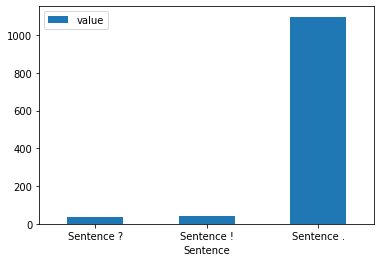

In [157]:
#Interogative sentences: 
x = whoiswho(df["Text"],"?")
#Exclamative sentences: 
y = whoiswho(df["Text"],"!")
Dot = len(df["Text"]) -int(x)- int(y)


df_graph = pd.DataFrame({'Sentence':['Sentence ?', 'Sentence !', 'Sentence .'], 'value':[x, y, Dot]})
ax = df_graph.plot.bar(x='Sentence', y='value', rot=0)


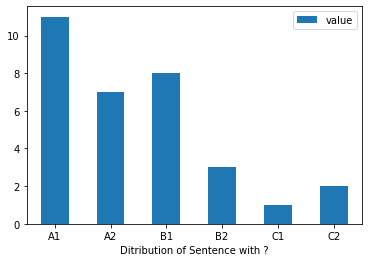

In [25]:
x,y,z,a,b,c = df[df["Difficulty"]== "A1"],df[df["Difficulty"]== "A2"],df[df["Difficulty"]== "B1"],df[df["Difficulty"]== "B2"],df[df["Difficulty"]== "C1"],df[df["Difficulty"]== "C2"]

df_graph = pd.DataFrame({'Ditribution of Sentence with ?':['A1', 'A2', 'B1',"B2","C1","C2"], 'value':[whoiswho(x["Text"],"?"), whoiswho(y["Text"],"?"), whoiswho(z["Text"],"?"),whoiswho(a["Text"],"?"),whoiswho(b["Text"],"?"),whoiswho(c["Text"],"?")]})
ax = df_graph.plot.bar(x='Ditribution of Sentence with ?', y='value', rot=0)

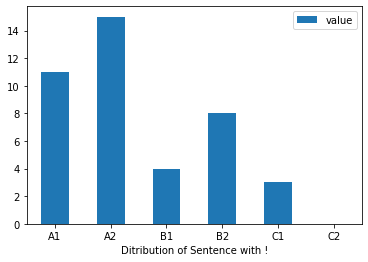

In [26]:
x,y,z,a,b,c = df[df["Difficulty"]== "A1"],df[df["Difficulty"]== "A2"],df[df["Difficulty"]== "B1"],df[df["Difficulty"]== "B2"],df[df["Difficulty"]== "C1"],df[df["Difficulty"]== "C2"]

df_graph = pd.DataFrame({'Ditribution of Sentence with !':['A1', 'A2', 'B1',"B2","C1","C2"], 'value':[whoiswho(x["Text"],"!"), whoiswho(y["Text"],"!"), whoiswho(z["Text"],"!"),whoiswho(a["Text"],"!"),whoiswho(b["Text"],"!"),whoiswho(c["Text"],"!")]})
ax = df_graph.plot.bar(x='Ditribution of Sentence with !', y='value', rot=0)